Зависимость NO2 от CO с учетом качества воздуха

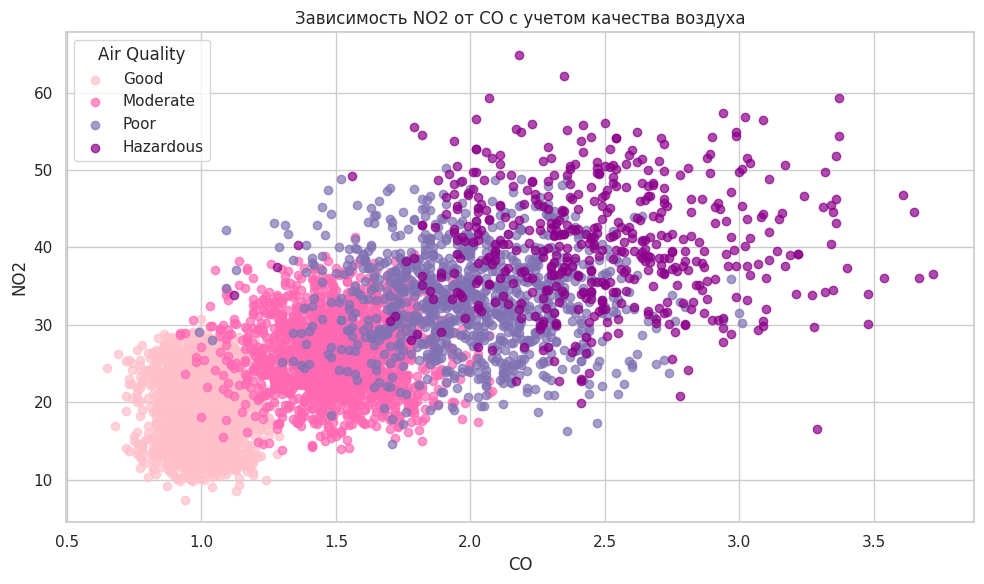

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.get_backend()
data = pd.read_csv('pollution_dataset.csv')

categories = {'Good': 'pink', 'Moderate': 'hotpink', 'Poor': 'm', 'Hazardous': 'darkmagenta'}
data['Color'] = data['Air Quality'].map(categories)

# Построение графика
plt.figure(figsize=(10, 6))
for category, color in categories.items():
    subset = data[data['Air Quality'] == category]
    plt.scatter(subset['CO'], subset['NO2'], label=category, color=color, alpha=0.7)

plt.title('Зависимость NO2 от CO с учетом качества воздуха')
plt.xlabel('CO')
plt.ylabel('NO2')
plt.legend(title='Air Quality')
plt.grid(True)
plt.tight_layout()

#исходя из графика мы можем заметить некую хаотичность в том где он находится, но в тоже время у него на самом деле есть некая кореляция
plt.show()

plt.savefig("test.png")

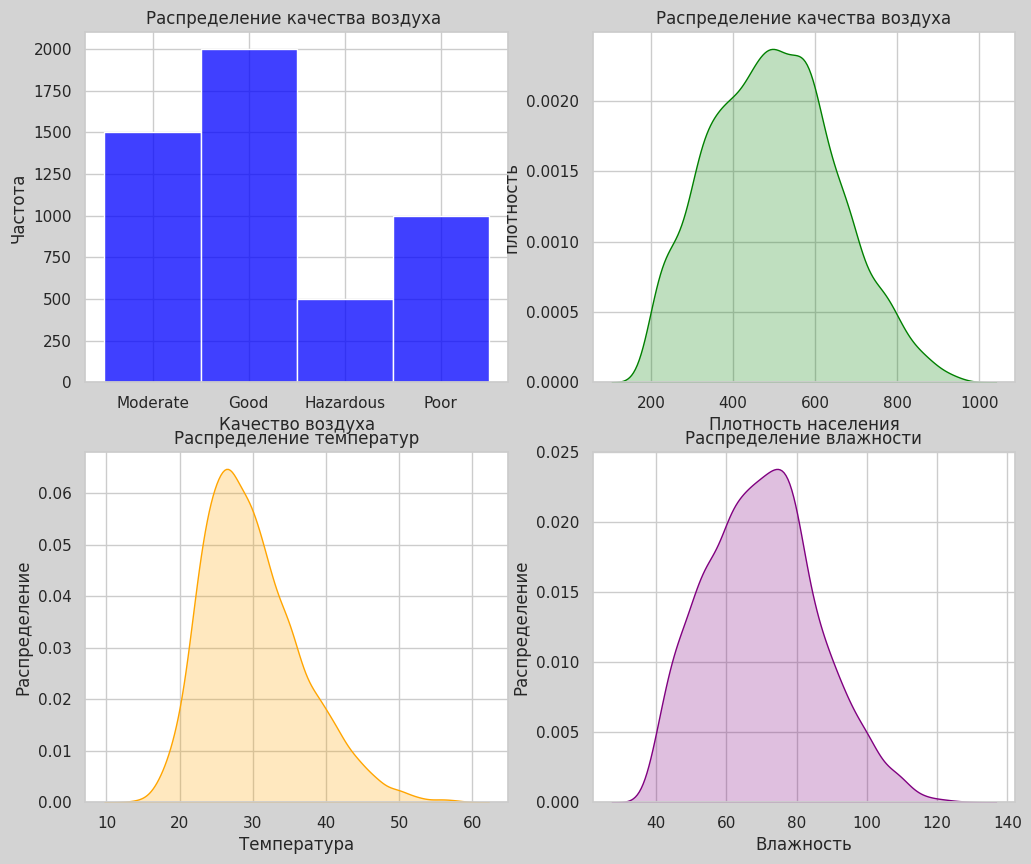

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (12, 10), facecolor = 'lightgrey')


plt.subplot(2, 2, 1)
sns.histplot(data['Air Quality'], bins=30,  color='blue', kde=False)
plt.title('Распределение качества воздуха ')
plt.xlabel('Качество воздуха')
plt.ylabel('Частота')
# Мы видим гистограмму в которой явно выписаны 4 интересующих нас значения, которые можно сравнить

plt.subplot(2, 2, 2)
sns.kdeplot(data['Population_Density'], color='green', fill=True)
plt.title('Распределение качества воздуха')
plt.xlabel('Плотность населения')
plt.ylabel('плотность')
# На графике проиллюстрировано распределение плотности населения от плотности

plt.subplot(2, 2, 3)
sns.kdeplot(data['Temperature'], color='orange', fill=True)
plt.title('Распределение температур')
plt.xlabel('Температура')
plt.ylabel('Распределение')
# Опять же на графике есть плотность, температура и зависимоть между ними

plt.subplot(2, 2, 4)
sns.kdeplot(data['Humidity'], color='purple', fill=True)
plt.title('Распределение влажности')
plt.xlabel('Влажность')
plt.ylabel('Распределение')
plt.show()
plt.savefig("test.png")
# На графике мы видим зависимость влажности и плотности, и схожую кареляцию с предыдущими графиками

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
dtype: int64


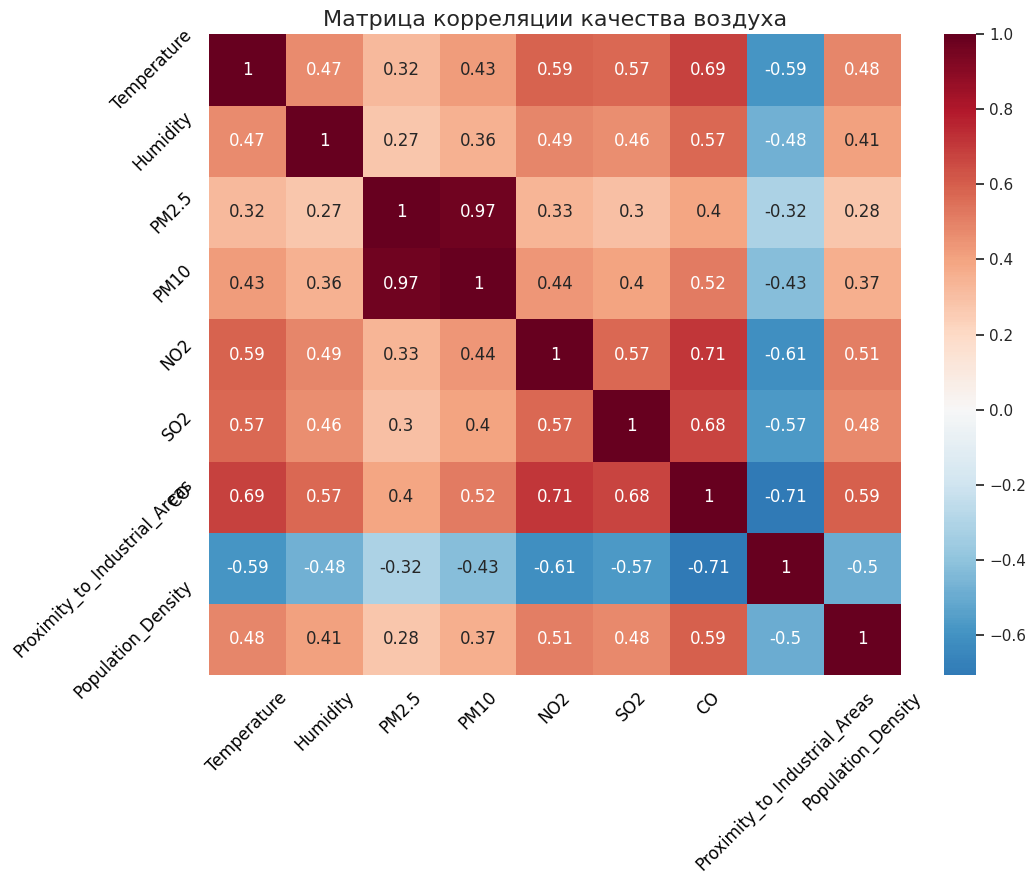

In [ ]:
data = pd.read_csv('pollution_dataset.csv')
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

print(data[numeric_columns].isnull().sum())

corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(11, 9))
sns.set(style="darkgrid")
sns.heatmap(corr_matrix, xticklabels=data.corr(numeric_only=True).columns, yticklabels = data.corr(numeric_only=True).columns, cmap='RdBu_r', center=0, annot=True)

plt.title('Матрица корреляции качества воздуха', fontsize=16)
plt.xticks(rotation=45, fontsize=12, fontweight='normal', color='black')
plt.yticks(rotation=45, fontsize=12, fontweight='normal', color='black')
plt.tight_layout()

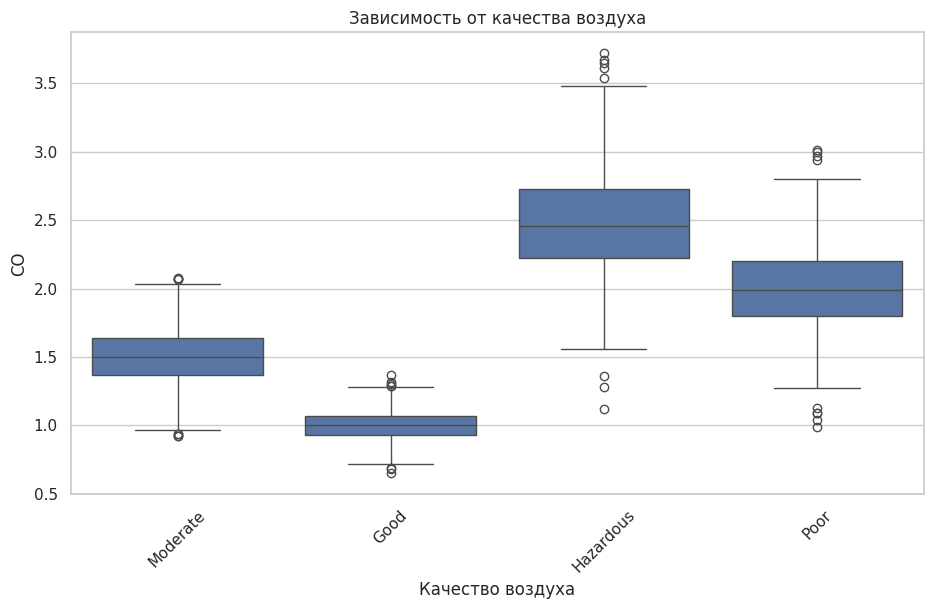

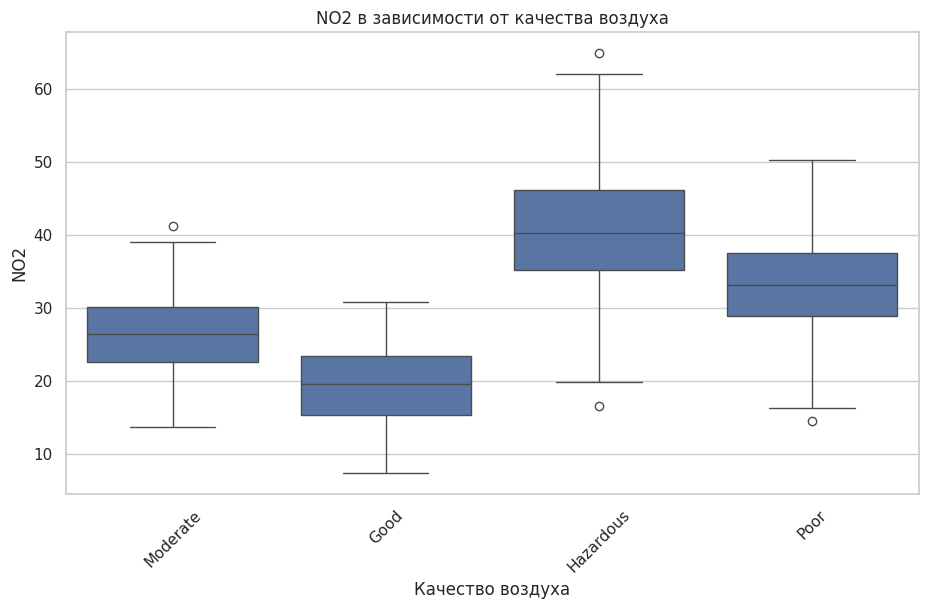

In [10]:
plt.figure(figsize=(11, 6))
sns.boxplot(x='Air Quality', y='CO', data=data)
plt.title('Зависимость от качества воздуха')
plt.xticks( rotation=45)
plt.xlabel('Качество воздуха')
plt.ylabel('CO')
plt.show()

sns.set(style = "whitegrid")
# Мы можем увидеть график boxplot на котором присутствует зависимость качество воздуха и присутствие газов CO и NO2
plt.figure(figsize = (11, 6))
sns.boxplot(x='Air Quality', y='NO2', data=data)
plt.title('NO2 в зависимости от качества воздуха')
plt.xticks(rotation=45)
plt.xlabel('Качество воздуха')
plt.ylabel('NO2')
plt.show()

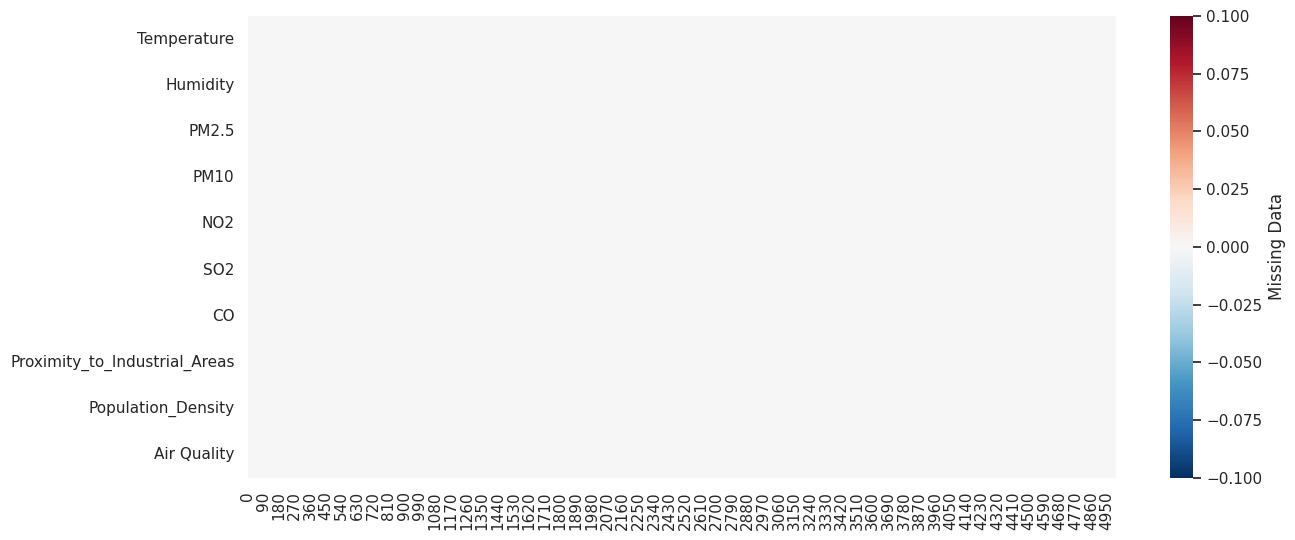

In [32]:
data = pd.read_csv('pollution_dataset.csv')
missing_data = data.isna()

plt.figure(figsize=(14,6))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(missing_data.isna().transpose(), cmap='RdBu_r', cbar_kws={'label': 'Missing Data'})
plt.show()

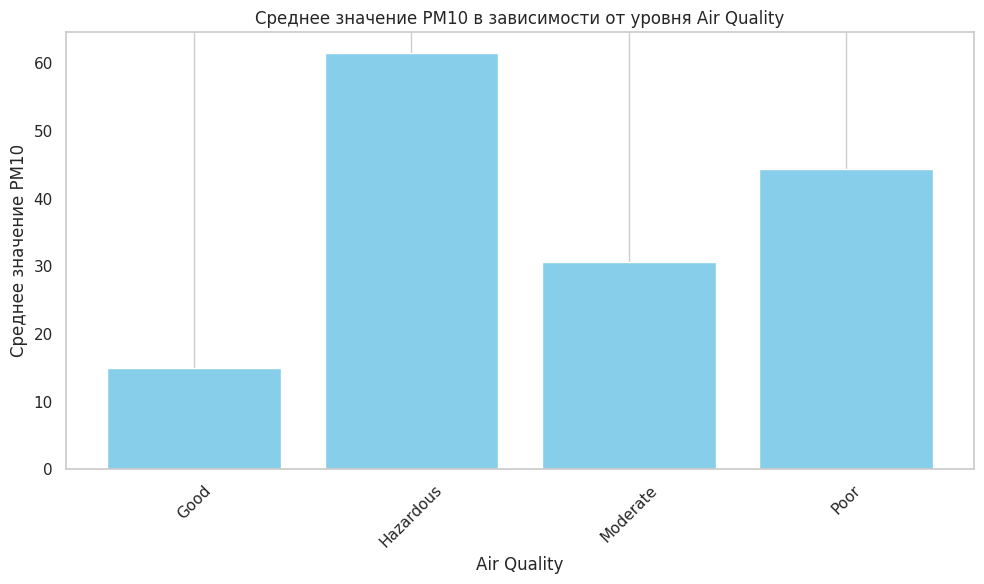

In [ ]:
sred_pm10 = data.groupby('Air Quality')['PM10'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(sred_pm10['Air Quality'], sred_pm10['PM10'], color='skyblue')
plt.xlabel('Качество воздуха')
plt.ylabel('Среднее значение PM10')
plt.title('Среднее значение PM10 в зависимости от качества воздуха')
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()
#На графике видно, как среднее значение PM10 варьируется в зависимости от уровня загрязнения воздуха. Рост значения PM10 свидетельствует о более высоком уровне загрязнения.

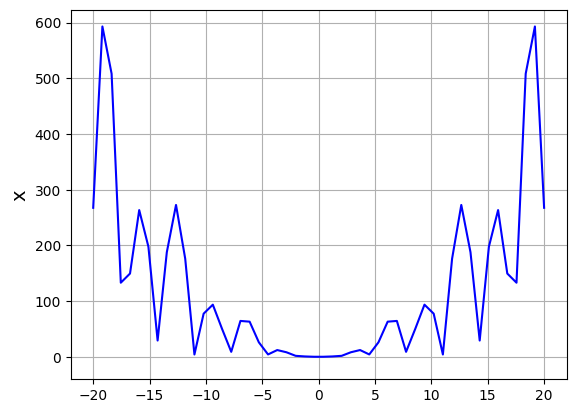

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x2 = np.linspace(-20, 20, 50)
y2 = [(math.cos(i)**math.pi*5)**(1/3)*i**2 for i in x2]
x = "x"
y1 = "y"
plt.plot(x2, y2, "b")
plt.plot(10, 10, -10, -10)
plt.ylabel(y1, fontsize=14)
plt.ylabel(x, fontsize=14)
plt.grid(True)
#проиллюстрирован график функци косинуса x в степени числа пи, домноженный на 5, под кубическим корнем, и домноженный на x в квадрате